# 그레디언트 부스팅

In [119]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier



In [2]:
df = pd.read_csv(os.getcwd()+"/HMEQ.csv",engine='python',encoding='euc-kr')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:

df.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:

df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)

In [5]:
df_train, df_test = train_test_split(df,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(2623, 13)
(1125, 13)


In [7]:

df_dummy=pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [8]:
df_train, df_test = train_test_split(df_dummy,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(2623, 19)
(1125, 19)


In [13]:

df_train_x = df_train.drop('BAD',axis=1)
df_train_y = df_train['BAD']

df_test_x = df_test.drop('BAD',axis=1)
df_test_y = df_test['BAD']

tree=GradientBoostingClassifier(random_state=1234)
tree.fit(df_train_x,df_train_y)

print(tree.score(df_train_x,df_train_y))
print(tree.score(df_test_x,df_test_y))


0.963400686237133
0.9413333333333334


In [25]:
train_score=[]; test_score = []
para_lr = [i*0.1 for i in range(1,10)]

for v_learning_rate in para_lr:
    rf=GradientBoostingClassifier(learning_rate=v_learning_rate, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
df_score_n=pd.DataFrame()
df_score_n['learning_rate']= para_lr
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,learning_rate,TrainScore,TestScore
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


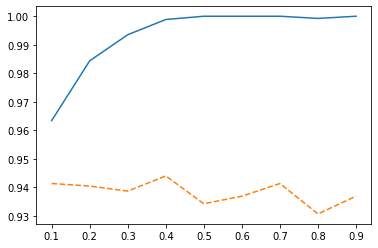

In [18]:
plt.plot(para_lr, train_score, linestyle = '-', label = "train score")
plt.plot(para_lr, test_score, linestyle = '--', label = "test_score")

In [22]:
train_score=[]; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=GradientBoostingClassifier(n_estimators=v_n_estimators,learning_rate=0.1, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_n=pd.DataFrame()
df_score_n['n_estimator']= para_n_tree
df_score_n['TrainScore']= train_score
df_score_n['TestScore']= test_score
df_score_n.round(3)

,n_estimator,TrainScore,TestScore
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.940
7,80,0.960,0.940
8,90,0.961,0.940
9,100,0.963,0.941


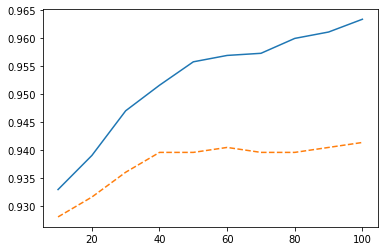

In [24]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = "train score")
plt.plot(para_n_tree, test_score, linestyle = '--', label = "test_score")

In [28]:
train_score=[]; test_score = []
para_depth = [n_depth for n_depth in range(1,20)]

for v_max_depth in para_depth:
    rf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=v_max_depth, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_depth=pd.DataFrame()
df_score_depth['depth']= para_depth
df_score_depth['TrainScore']= train_score
df_score_depth['TestScore']= test_score
df_score_depth.round(3)



,depth,TrainScore,TestScore
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.992,0.941
5,6,0.998,0.949
6,7,1.000,0.946
7,8,1.000,0.948
8,9,1.000,0.948
9,10,1.000,0.947


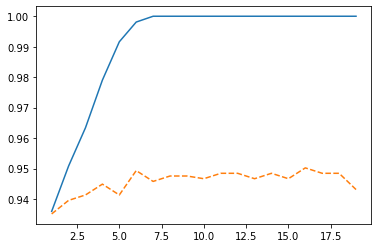

In [29]:
plt.plot(para_depth, train_score, linestyle = '-', label = "train score")
plt.plot(para_depth, test_score, linestyle = '--', label = "test_score")

In [31]:
train_score=[]; test_score = []
para_split = [n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=4,min_samples_split=v_min_samples_split, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_split=pd.DataFrame()
df_score_split['n_estimator']= para_split
df_score_split['TrainScore']= train_score
df_score_split['TestScore']= test_score
df_score_split.round(3)

,n_estimator,TrainScore,TestScore
0,4,0.976,0.943
1,6,0.977,0.944
2,8,0.979,0.941
3,10,0.977,0.945
4,12,0.978,0.941
5,14,0.977,0.942
6,16,0.976,0.942
7,18,0.977,0.941
8,20,0.976,0.942
9,22,0.971,0.944


In [36]:
train_score=[]; test_score = []
para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=4,min_samples_leaf=v_min_samples_leaf, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))


df_score_leaf=pd.DataFrame()
df_score_leaf['leaf']= para_leaf
df_score_leaf['TrainScore']= train_score
df_score_leaf['TestScore']= test_score
df_score_leaf.round(3)

,leaf,TrainScore,TestScore
0,10,0.977,0.946
1,20,0.970,0.942
2,30,0.970,0.942
3,40,0.963,0.940
4,50,0.960,0.942
5,60,0.958,0.939
6,70,0.958,0.937
7,80,0.955,0.940
8,90,0.950,0.936
9,100,0.948,0.938


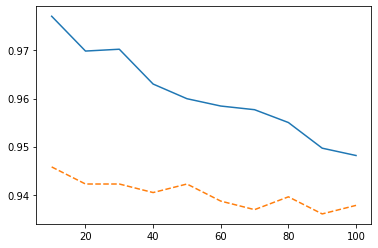

In [37]:
plt.plot(para_leaf, train_score, linestyle = '-', label = "train score")
plt.plot(para_leaf, test_score, linestyle = '--', label = "test_score")

In [43]:
gb_final = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=4,min_samples_leaf=10, random_state = 1234)
gb_final.fit(df_train_x,df_train_y)
y_pred = gb_final.predict(df_test_x) 


print(gb_final.score(df_train_x, df_train_y))
print(gb_final.score(df_test_x, df_test_y))
print(confusion_matrix(df_test_y,y_pred))

0.9771254288982082
0.9457777777777778
[[1018    3]
 [  58   46]]


In [41]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)


,Feature,Importance
9,DEBTINC,0.327
6,CLAGE,0.120
2,VALUE,0.107
8,CLNO,0.105
5,DELINQ,0.100
0,LOAN,0.072
1,MORTDUE,0.041
7,NINQ,0.038
4,DEROG,0.034
3,YOJ,0.033


Text(0, 0.5, '설명변수')

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

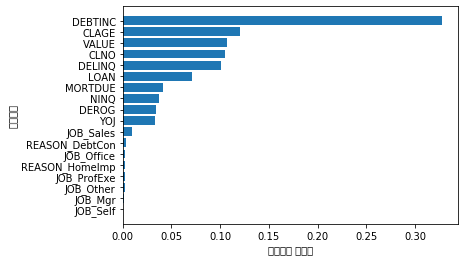

In [48]:

df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [50]:
estimator = GradientBoostingClassifier()
param_grid = {"learning_rate":para_lr, 
              "max_depth":para_depth,
             "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs =-1)
grid_dt.fit(df_train_x, df_train_y)

print(grid_dt.best_estimator_)
print(grid_dt.best_params_)
print(grid_dt.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
{'learning_rate': 0.5, 'max_depth': 7, 'min_samples_leaf': 10}
0.95


# 서포트 벡터 머신

In [66]:
df = pd.read_csv(os.getcwd()+"/HMEQ.csv",engine='python',encoding='euc-kr')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [67]:
df.isnull().sum(axis=0)
df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)





In [68]:

df_dummy=pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [73]:
df_train, df_test = train_test_split(df_dummy,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(2623, 19)
(1125, 19)


In [74]:

df_train_x = df_train.drop('BAD',axis=1)
df_train_y = df_train['BAD']

df_test_x = df_test.drop('BAD',axis=1)
df_test_y = df_test['BAD']
df_train_x

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.000000,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.000000,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.000000,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.000000,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.000000,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,28900,91683,127833.0,0.000000,1,0.0,187.242403,3.0,37,33.168757,1,0,0,0,0,1,0,0
3125,27100,20497,74244.0,9.130398,1,2.0,93.060343,1.0,25,27.361340,1,0,0,0,1,0,0,0
1318,14000,51721,61193.0,0.000000,0,0.0,186.999359,2.0,12,25.810011,1,0,0,0,1,0,0,0
723,10800,67740,108135.0,11.000000,0,0.0,163.273832,1.0,12,38.383498,1,0,0,1,0,0,0,0


In [75]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x,df_train_y)
print(svm_uncustomized.score(df_train_x,df_train_y))
print(svm_uncustomized.score(df_test_x,df_test_y))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0
0.9075555555555556


In [76]:
train_accuracy = []; test_accuracy=[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,1.000,0.908
3,10.00,1.000,0.908


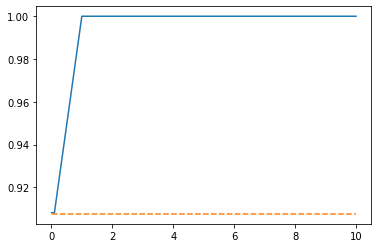

In [59]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_c, test_accuracy, linestyle = '--', label = "test_score")

In [61]:
train_accuracy = []; test_accuracy=[]
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(C=0.1,gamma=v_gamma,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['gamma']=para_gamma
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.908,0.908


In [77]:
v_feature_name = df_train_x.columns
df_x = df_dummy.drop('BAD', axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [78]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled,test_size=0.3 , random_state=1234)
print(df_scaled_train_x.shape)
print(df_scaled_test_x.shape)

(2623, 18)
(1125, 18)


In [80]:
svm_scaled = SVC(random_state =1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
print(svm_scaled.score(df_scaled_train_x,df_train_y))
print(svm_scaled.score(df_scaled_test_x,df_test_y))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9435760579489134
0.9351111111111111


In [82]:
train_accuracy = []; test_accuracy=[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.944,0.935
3,10.00,0.979,0.949


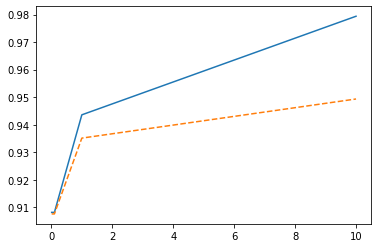

In [83]:
plt.plot(para_c, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_c, test_accuracy, linestyle = '--', label = "test_score")

In [84]:
train_accuracy = []; test_accuracy=[]
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(C=1,gamma=v_gamma,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['gamma']=para_gamma
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.923,0.920
1,0.10,0.960,0.942
2,1.00,0.996,0.920
3,10.00,1.000,0.908


0.9595882577201678
0.9422222222222222
[[1021    0]
 [  65   39]]


In [86]:
estimator = SVC(random_state=1234)
param_grid = {"C":para_c, 'gamma':para_gamma}

grid_rf = GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)
print(grid_rf.best_estimator_)
print(grid_rf.best_params_)
print(grid_rf.best_score_.round(3))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)
{'C': 10, 'gamma': 0.1}
0.95


# 인공 신경망

In [88]:
df = pd.read_csv(os.getcwd()+"/HMEQ.csv",engine='python',encoding='euc-kr')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [89]:
df.isnull().sum(axis=0)
df['JOB'].fillna('Other',inplace=True)
df.fillna(df.mean(),inplace=True)\

In [92]:
df_dummy=pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [93]:
df_train, df_test = train_test_split(df_dummy,test_size=0.3 , random_state=1234)
print(df_train.shape)
print(df_test.shape)

(2623, 19)
(1125, 19)


In [94]:


df_train_x = df_train.drop('BAD',axis=1)
df_train_y = df_train['BAD']

df_test_x = df_test.drop('BAD',axis=1)
df_test_y = df_test['BAD']

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.000000,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.000000,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.000000,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.000000,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.000000,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,28900,91683,127833.0,0.000000,1,0.0,187.242403,3.0,37,33.168757,1,0,0,0,0,1,0,0
3125,27100,20497,74244.0,9.130398,1,2.0,93.060343,1.0,25,27.361340,1,0,0,0,1,0,0,0
1318,14000,51721,61193.0,0.000000,0,0.0,186.999359,2.0,12,25.810011,1,0,0,0,1,0,0,0
723,10800,67740,108135.0,11.000000,0,0.0,163.273832,1.0,12,38.383498,1,0,0,1,0,0,0,0


In [95]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)
print(nn_uncustomized.score(df_train_x,df_train_y))
print(nn_uncustomized.score(df_test_x,df_test_y))

0.9096454441479223
0.9093333333333333


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [97]:
train_accuracy = []; test_accuracy=[]
para_hidden = [20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden ,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['hidden']=para_hidden
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,hidden,TrainAccuracy,TestAccuracy
0,20,0.909,0.904
1,40,0.910,0.912
2,60,0.910,0.908
3,80,0.907,0.904
4,100,0.910,0.909
5,120,0.129,0.123
6,140,0.910,0.909
7,160,0.910,0.909


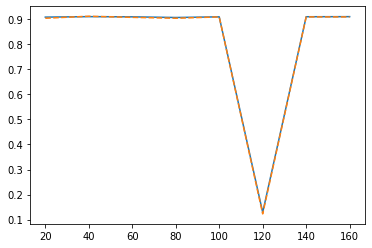

In [98]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = "test_score")

In [99]:
train_accuracy = []; test_accuracy=[]
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes=40,activation=v_function ,random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['gamma']=para_function
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,gamma,TrainAccuracy,TestAccuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.910,0.912


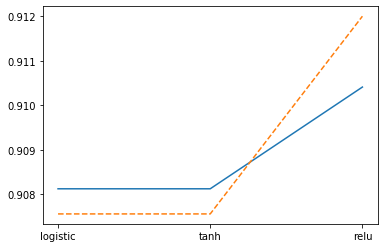

In [100]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_function, test_accuracy, linestyle = '--', label = "test_score")

In [101]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [102]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size = 0.3,random_state=1234)

In [103]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x,df_train_y)
print(nn_scaled.score(df_scaled_train_x,df_train_y))
print(nn_scaled.score(df_scaled_test_x,df_test_y))

0.9714067861227602
0.9431111111111111


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [106]:
train_accuracy = []; test_accuracy=[]
para_hidden = [20*hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden) ,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['hidden']=para_hidden
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,hidden,TrainAccuracy,TestAccuracy
0,20,0.975,0.948
1,40,0.994,0.952
2,60,0.999,0.949
3,80,1.000,0.955
4,100,1.000,0.953
5,120,1.000,0.951
6,140,1.000,0.955
7,160,1.000,0.955
8,180,1.000,0.957
9,200,1.000,0.956


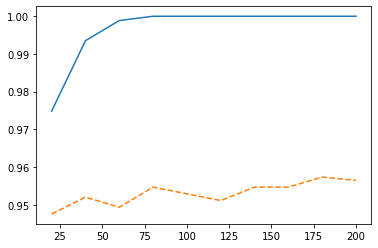

In [107]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = "test_score")

In [109]:
train_accuracy = []; test_accuracy=[]
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes=(80,80),activation=v_function ,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['function']=para_function
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,function,TrainAccuracy,TestAccuracy
0,logistic,0.937,0.933
1,tanh,0.999,0.952
2,relu,1.000,0.955


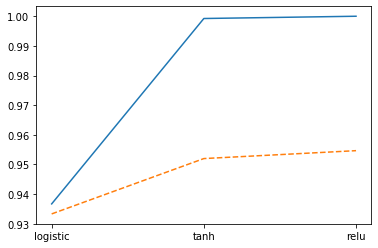

In [110]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_function, test_accuracy, linestyle = '--', label = "test_score")

In [112]:
train_accuracy = []; test_accuracy=[]
para_solve = ['lbfgs', 'sgd', 'adam']

for v_solve in para_solve:
    nn = MLPClassifier(hidden_layer_sizes=(80,80),activation='relu',solver=v_solve ,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['function']=para_solve
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,function,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.948
1,sgd,0.934,0.928
2,adam,1.000,0.955


ValueError: x and y must have same first dimension, but have shapes (3,) and (9,)

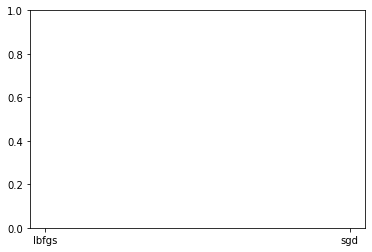

In [118]:
plt.plot(para_solve, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_solve, test_accuracy, linestyle = '--', label = "test_score")

In [114]:
train_accuracy = []; test_accuracy=[]
para_batch = [20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(solver='adam',hidden_layer_sizes=(80,80),activation='relu',batch_size=v_batch ,random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['batch']=para_batch
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy
df_accuracy_c.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

,batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.959
1,40,1.0,0.956
2,60,1.0,0.950
3,80,1.0,0.952
4,100,1.0,0.952
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.954
8,180,1.0,0.956


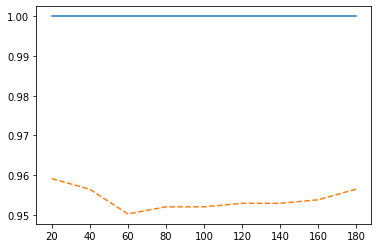

In [115]:
plt.plot(para_batch, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_batch, test_accuracy, linestyle = '--', label = "test_score")

In [117]:
nn_final = MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam',
                        batch_size=100,random_state=1234)
nn_final.fit(df_scaled_train_x,df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print(nn_final.score(df_scaled_train_x,df_train_y))
print(nn_final.score(df_scaled_test_x,df_test_y))
print(confusion_matrix(df_test_y,y_pred))

1.0
0.952
[[1018    3]
 [  51   53]]


# KNN 시작

In [120]:
knn=KNeighborsClassifier()
knn.fit(df_train_x,df_train_y)
print(knn.score(df_train_x,df_train_y))
print(knn.score(df_test_x,df_test_y))

0.9161265726267632
0.9075555555555556


In [123]:
train_accuracy=[];test_accuracy=[]
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['Train Accuracy'] = train_accuracy
df_accuracy_neighbors['Test Accuracy'] = test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,Train Accuracy,Test Accuracy
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


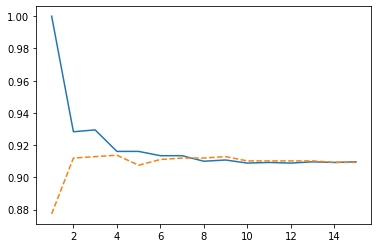

In [124]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = "train score")
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = "test_score")

In [127]:
train_accuracy=[];test_accuracy=[]
para_n_neighbors = [i for i in range(1,11)]*2
para_weights=(['uniform'])*10+(['distance']*10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['Weights'] = para_weights
df_accuracy_neighbors['Train Accuracy'] = train_accuracy
df_accuracy_neighbors['Test Accuracy'] = test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,Weights,Train Accuracy,Test Accuracy
0,1,uniform,1.000,0.877
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.913
3,4,uniform,0.916,0.914
4,5,uniform,0.916,0.908
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [131]:
df_accuracy_weights_pivot = df_accuracy_neighbors.pivot(index='Neighbors',columns='Weights',values=['Train Accuracy','Test Accuracy'])
df_accuracy_weights_pivot

Train Accuracy           Test Accuracy          
Weights         distance   uniform      distance   uniform
Neighbors                                                 
1                    1.0  1.000000      0.877333  0.877333
2                    1.0  0.928326      0.877333  0.912000
3                    1.0  0.929470      0.912000  0.912889
4                    1.0  0.916127      0.913778  0.913778
5                    1.0  0.916127      0.912889  0.907556
6                    1.0  0.913458      0.912889  0.911111
7                    1.0  0.913458      0.912889  0.912000
8                    1.0  0.910027      0.913778  0.912000
9                    1.0  0.910789      0.914667  0.912889
10                   1.0  0.908883      0.914667  0.910222

In [133]:
level0 =df_accuracy_weights_pivot.columns.get_level_values(0)
level1 =df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.colums =level0+'_'+level1
df_accuracy_weights_pivot.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


Train Accuracy           Test Accuracy          
Weights         distance   uniform      distance   uniform
Neighbors                                                 
1                    1.0  1.000000      0.877333  0.877333
2                    1.0  0.928326      0.877333  0.912000
3                    1.0  0.929470      0.912000  0.912889
4                    1.0  0.916127      0.913778  0.913778
5                    1.0  0.916127      0.912889  0.907556

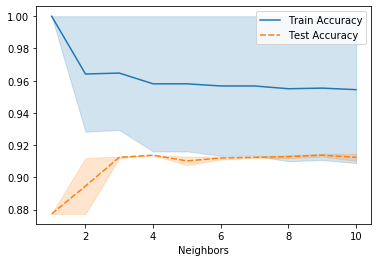

In [135]:
import seaborn as sns
sns.lineplot(data=df_accuracy_weights_pivot)

In [137]:
train_accuracy=[];test_accuracy=[]
para_n_neighbors = [i for i in range(1,11)]*3
para_metric = ["minkowski"]*10 +["euclidean"]*10+['manhattan']*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,metric=v_metric,weights='uniform')
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['Metic'] = para_metric
df_accuracy_neighbors['Train Accuracy'] = train_accuracy
df_accuracy_neighbors['Test Accuracy'] = test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,Metic,Train Accuracy,Test Accuracy
0,1,minkowski,1.000,0.877
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.913
3,4,minkowski,0.916,0.914
4,5,minkowski,0.916,0.908
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


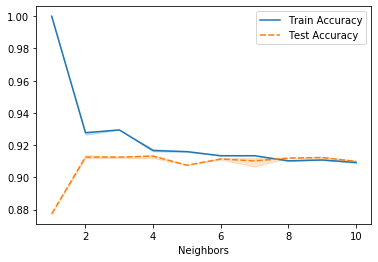

In [139]:
df_accuracy_metic_pivot = df_accuracy_neighbors.pivot(index='Neighbors',columns='Metic',values=['Train Accuracy','Test Accuracy'])
level0 =df_accuracy_metic_pivot.columns.get_level_values(0)
level1 =df_accuracy_metic_pivot.columns.get_level_values(1)
df_accuracy_metic_pivot.colums =level0+'_'+level1
df_accuracy_metic_pivot.head()
sns.lineplot(data=df_accuracy_metic_pivot)

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=4,weights='uniform',metric='euclidean')
knn_model.fit(df_train_x,df_train_y)

y_pred = knn_model.predict(df_test_x)
print(knn_model.score(df_train_x,df_train_y))
print(knn_model.score(df_test_x,df_test_y))
print(confusion_matrix(df_test_y,y_pred))

0.9161265726267632
0.9137777777777778
[[1018    3]
 [  94   10]]
